In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML_Artivatic/train_indessa.csv') 

In [136]:
testdf=pd.read_csv('/content/drive/MyDrive/ML_Artivatic/test_indessa.csv')

In [137]:
testdf.shape

(354951, 44)

In [138]:
testdf.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

In [139]:
df.shape

(532428, 45)

In [140]:
corr=df.corr()
corr1=testdf.corr()

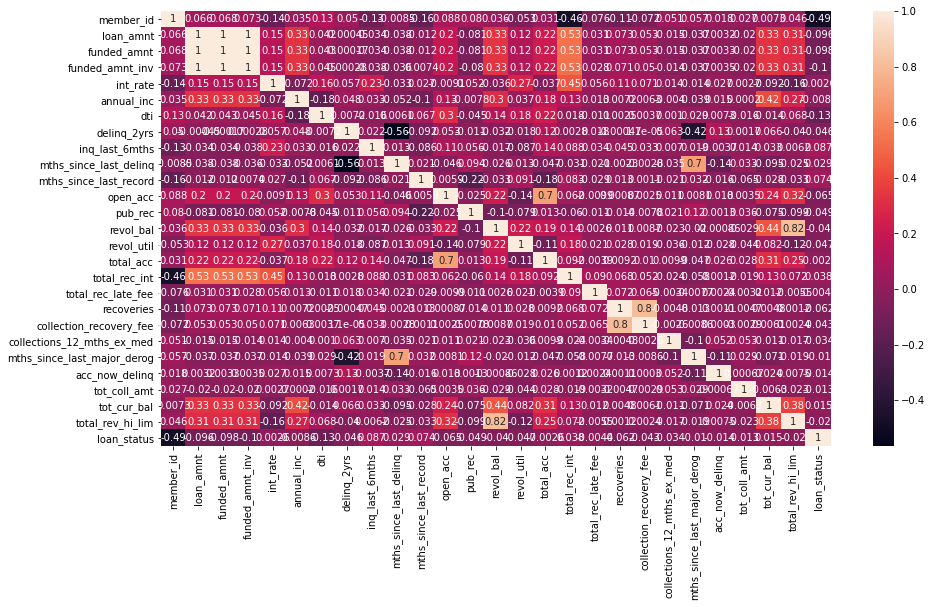

In [141]:
sns.heatmap(corr,annot=True)
plt.rcParams["figure.figsize"] =(15,8)

In [142]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [143]:
correlation(df,0.75)
correlation(testdf,0.75)

        member_id  loan_amnt       term  ... tot_coll_amt  tot_cur_bal loan_status
0        58189336      14350  36 months  ...          0.0      28699.0           0
1        70011223       4800  36 months  ...          0.0       9974.0           0
2        70255675      10000  36 months  ...         65.0      38295.0           0
3         1893936      15000  36 months  ...          0.0      55564.0           0
4         7652106      16000  36 months  ...          0.0      47159.0           0
...           ...        ...        ...  ...          ...          ...         ...
532423   31296187      20000  36 months  ...          0.0      83087.0           0
532424   29403184      12000  60 months  ...          0.0     227812.0           0
532425    7357607      18725  60 months  ...          0.0      26010.0           1
532426   23182668      21000  60 months  ...          0.0      29197.0           0
532427   46122259      10000  36 months  ...          0.0      47866.0           0

[53

In [144]:
df.shape

(532428, 41)

In [145]:
testdf

,member_id,loan_amnt,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,11937648,14000,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0
1,38983318,16000,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0
2,27999917,11050,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0
3,61514932,35000,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0
4,59622821,6500,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,19145105,15000,36 months,BAT4217242,6.49,A,A2,Network administrator,1 year,MORTGAGE,97250.0,Not Verified,n,NaN,credit_card,Credit card refinancing,761xx,TX,12.46,0.0,0.0,77.0,NaN,12.0,0.0,12201,27.7,24.0,w,1180.32,0.0,0.0,0.0,77.0,INDIVIDUAL,NaN,83th week,0.0,0.0,143920.0
354947,46304777,35000,60 months,,25.89,G,G3,Credit Risk Analyst,1 year,OWN,180000.0,Verified,n,NaN,debt_consolidation,Debt consolidation,115xx,NY,11.78,2.0,2.0,19.0,NaN,21.0,0.0,52584,61.4,33.0,f,6508.41,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,0.0,772713.0
354948,903745,14000,60 months,BAT6117184,17.51,E,E4,USPS/Nashua L&DC,10+ years,OWN,56000.0,Verified,n,I will be using the loan money to pay off the ...,home_improvement,Debt Consolidation,038xx,NH,16.44,0.0,3.0,54.0,103.0,11.0,1.0,10948,66.1,25.0,f,3456.24,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,87th week,0.0,NaN,NaN
354949,53032475,20000,36 months,BAT3840785,7.26,A,A4,Computer Engineer,< 1 year,MORTGAGE,100000.0,Source Verified,n,NaN,credit_card,Credit card refinancing,206xx,MD,15.00,0.0,0.0,NaN,NaN,7.0,0.0,33599,61.5,11.0,w,766.84,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,35th week,0.0,0.0,291998.0


In [146]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util  

In [147]:
df.head(5)

,member_id,loan_amnt,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,58189336,14350,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,0
1,70011223,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,0
2,70255675,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,0
3,1893936,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,0
4,7652106,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,0


In [148]:
#Now we will remove some extra columns

In [149]:
droplist=['zip_code',	'addr_state','desc','emp_title','batch_enrolled','title']
df=df.drop(droplist,axis=1)
testdf=testdf.drop(droplist,axis=1)

In [150]:
df.head(2)

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,58189336,14350,36 months,19.19,E,E3,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,0
1,70011223,4800,36 months,10.99,B,B4,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,0


In [151]:
testdf.head(2)

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,11937648,14000,60 months,16.24,C,C5,4 years,RENT,73500.0,Source Verified,n,credit_card,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0
1,38983318,16000,60 months,9.49,B,B2,5 years,MORTGAGE,105000.0,Source Verified,n,major_purchase,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0


In [152]:
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce') 



In [153]:
testdf['emp_length'].replace('n/a', '0', inplace=True)
testdf['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
testdf['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
testdf['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
testdf['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
testdf['emp_length'] = pd.to_numeric(testdf['emp_length'], errors='coerce')

In [154]:
df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True) 

# Convert it to numeric
df['sub_grade'] = pd.to_numeric(df['sub_grade'], errors='coerce') 

In [155]:
testdf['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
testdf['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
testdf['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
testdf['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
testdf['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
testdf['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
testdf['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True) 

# Convert it to numeric
testdf['sub_grade'] = pd.to_numeric(testdf['sub_grade'], errors='coerce') 

In [156]:
df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

In [157]:
testdf['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

testdf['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
testdf['last_week_pay'] = pd.to_numeric(testdf['last_week_pay'], errors='coerce')

In [158]:
# Replaces months string with '' 
testdf['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 

# Convert it to numeric
testdf['term'] = pd.to_numeric(testdf['term'], errors='coerce')

In [159]:
df

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,58189336,14350,36 months,19.19,E,43,9.0,OWN,28700.0,Source Verified,n,debt_consolidation,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26.0,0.0,0.0,28699.0,0
1,70011223,4800,36 months,10.99,B,14,0.0,MORTGAGE,65000.0,Source Verified,n,home_improvement,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,0.0,9974.0,0
2,70255675,10000,36 months,7.26,A,4,2.0,OWN,45000.0,Not Verified,n,debt_consolidation,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,65.0,38295.0,0
3,1893936,15000,36 months,19.72,D,35,10.0,RENT,105000.0,Not Verified,n,debt_consolidation,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135.0,0.0,0.0,55564.0,0
4,7652106,16000,36 months,10.64,B,12,10.0,RENT,52000.0,Verified,n,credit_card,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96.0,0.0,0.0,47159.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,36 months,12.49,B,15,10.0,MORTGAGE,75000.0,Source Verified,n,debt_consolidation,14.53,0.0,0.0,NaN,51.0,12.0,1.0,15775.0,63.6,34.0,f,2595.45,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,65.0,0.0,0.0,83087.0,0
532424,29403184,12000,60 months,14.99,C,25,10.0,MORTGAGE,59000.0,Not Verified,n,debt_consolidation,22.97,0.0,0.0,NaN,81.0,10.0,1.0,9453.0,53.1,29.0,w,2182.92,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,70.0,0.0,0.0,227812.0,0
532425,7357607,18725,60 months,20.80,E,41,8.0,RENT,42504.0,Verified,n,debt_consolidation,27.27,0.0,1.0,26.0,NaN,14.0,0.0,12085.0,49.9,26.0,f,645.32,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,0.0,26010.0,1
532426,23182668,21000,60 months,16.29,D,32,1.0,RENT,50000.0,Source Verified,n,credit_card,14.91,0.0,1.0,NaN,NaN,7.0,0.0,20902.0,89.7,14.0,w,4619.79,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,78.0,0.0,0.0,29197.0,0


In [160]:
df['term']=df['term'].replace('36 months',1)
df['term']=df['term'].replace('60 months',2)

In [161]:
columns = ['term', 'loan_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'emp_length']
for col in columns:
      #print(df[col].median())
      df[col].fillna(df[col].median(), inplace=True)  

  
num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med']
for col in num_cols:
    df[col].fillna(0, inplace=True)       

In [162]:
columns = ['term', 'loan_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'emp_length']
for col in columns:
    testdf[col].fillna(testdf[col].median(), inplace=True)  

  
num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med']
for col in num_cols:
    testdf[col].fillna(0, inplace=True) 

In [163]:
df.isnull().sum() 

member_id                           0
loan_amnt                           0
term                                0
int_rate                            0
grade                               0
sub_grade                           0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
pymnt_plan                          0
purpose                             0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec                            16
revol_bal                           0
revol_util                          0
total_acc                           0
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collections_

In [164]:
# Converts categorical variable into dummy/indicator variables.
cate_attr = ['home_ownership', 'purpose']
for cat in cate_attr:
   df_col = [cat]
   df[cat] = df[cat].astype("category")
   df[cat] = pd.get_dummies(df, columns=df_col) 

In [165]:
# Converts categorical variable into dummy/indicator variables.
cate_attr = ['home_ownership', 'purpose']
for cat in cate_attr:
   testdf_col = [cat]
   testdf[cat] = testdf[cat].astype("category")
   testdf[cat] = pd.get_dummies(testdf, columns=df_col) 

In [166]:
final_df = df.copy()
final_df = final_df.drop(['loan_status'], axis=1)  

In [167]:
test_final_df = testdf.copy()


In [168]:
#convert string to num
def convert(col):
    ff= dict(zip(df[col].unique(), range(0,len(df[col].unique()))))
    df[col] = df[col].map(ff , df[col])

In [169]:
strtonum=['verification_status_joint','application_type','initial_list_status','verification_status','pymnt_plan','purpose','home_ownership','grade']
for x in (strtonum):
    convert(x)

In [170]:
df.head(2)

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,58189336,14350,1,19.19,0,43,9.0,0,28700.0,0,0,0,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,74.0,0,0,26.0,0.0,0.0,28699.0,0
1,70011223,4800,1,10.99,1,14,0.0,1,65000.0,0,0,1,3.64,0.0,1.0,31.0,70.0,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,44.0,0,0,9.0,0.0,0.0,9974.0,0


In [171]:
#convert string to num
def convert(col):
    ff= dict(zip(testdf[col].unique(), range(0,len(testdf[col].unique()))))
    testdf[col] = testdf[col].map(ff , testdf[col])

In [172]:
strtonum=['verification_status_joint','application_type','initial_list_status','verification_status','pymnt_plan','purpose','home_ownership','grade']
for x in (strtonum):
    convert(x)

In [173]:
testdf.head(2)

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,11937648,14000,60,16.24,0,25,4.0,0,73500.0,0,0,0,28.65,1.0,1.0,20.0,70.0,16.0,0.0,29828,65.3,53.0,0,3915.61,0.0,0.0,0.0,44.0,0,0,104.0,0.0,0.0,85230.0
1,38983318,16000,60,9.49,1,12,5.0,1,105000.0,0,0,1,31.19,0.0,0.0,31.0,70.0,8.0,0.0,4161,19.4,63.0,1,1495.06,0.0,0.0,0.0,44.0,0,0,57.0,0.0,0.0,444991.0


In [174]:
df.isnull().sum()

member_id                       0
loan_amnt                       0
term                            0
int_rate                        0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
pymnt_plan                      0
purpose                         0
dti                             0
delinq_2yrs                    16
inq_last_6mths                 16
mths_since_last_delinq          0
mths_since_last_record          0
open_acc                        0
pub_rec                        16
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collections_12_mths_ex_med      0
mths_since_last_major_derog     0
application_type                0
verification_s

In [175]:
testdf.isnull().sum()

member_id                       0
loan_amnt                       0
term                            0
int_rate                        0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
pymnt_plan                      0
purpose                         0
dti                             0
delinq_2yrs                    13
inq_last_6mths                 13
mths_since_last_delinq          0
mths_since_last_record          0
open_acc                        0
pub_rec                        13
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collections_12_mths_ex_med      0
mths_since_last_major_derog     0
application_type                0
verification_s

In [176]:
for col in ['emp_length','mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med','mths_since_last_major_derog','last_week_pay','tot_coll_amt','tot_cur_bal']:
    mod=int(df[col].mode())
    df[col].fillna(mod, inplace=True) 

In [177]:
for col in ['emp_length','mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med','mths_since_last_major_derog','last_week_pay','tot_coll_amt','tot_cur_bal']:
    mod=int(testdf[col].mode())
    testdf[col].fillna(mod, inplace=True) 

In [178]:
df.isnull().sum()

member_id                       0
loan_amnt                       0
term                            0
int_rate                        0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
pymnt_plan                      0
purpose                         0
dti                             0
delinq_2yrs                    16
inq_last_6mths                 16
mths_since_last_delinq          0
mths_since_last_record          0
open_acc                        0
pub_rec                        16
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collections_12_mths_ex_med      0
mths_since_last_major_derog     0
application_type                0
verification_s

In [179]:
testdf.isnull().sum()

member_id                       0
loan_amnt                       0
term                            0
int_rate                        0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
pymnt_plan                      0
purpose                         0
dti                             0
delinq_2yrs                    13
inq_last_6mths                 13
mths_since_last_delinq          0
mths_since_last_record          0
open_acc                        0
pub_rec                        13
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collections_12_mths_ex_med      0
mths_since_last_major_derog     0
application_type                0
verification_s

In [180]:
df = df.dropna(axis=0, subset=['delinq_2yrs'])
testdf = testdf.dropna(axis=0, subset=['delinq_2yrs'])

In [181]:
df.isnull().sum()

member_id                      0
loan_amnt                      0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
application_type               0
verification_status_joint      0
last_week_

In [182]:
testdf.isnull().sum()

member_id                      0
loan_amnt                      0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
application_type               0
verification_status_joint      0
last_week_

In [183]:
X=df.drop('loan_status',axis=1)

In [184]:
y=df['loan_status']

In [185]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [186]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [187]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [189]:
y_pred=model.predict(X_test)

In [190]:
X_train.shape

(372688, 34)

In [191]:
X_test.shape

(159724, 34)

In [192]:
y_train.shape

(372688,)

In [193]:
  from sklearn.metrics import roc_auc_score,roc_curve,auc
  roc_auc_score(y_test, y_pred, average=None)

0.6888479586436564

In [194]:
y_pred_test=model.predict(testdf)

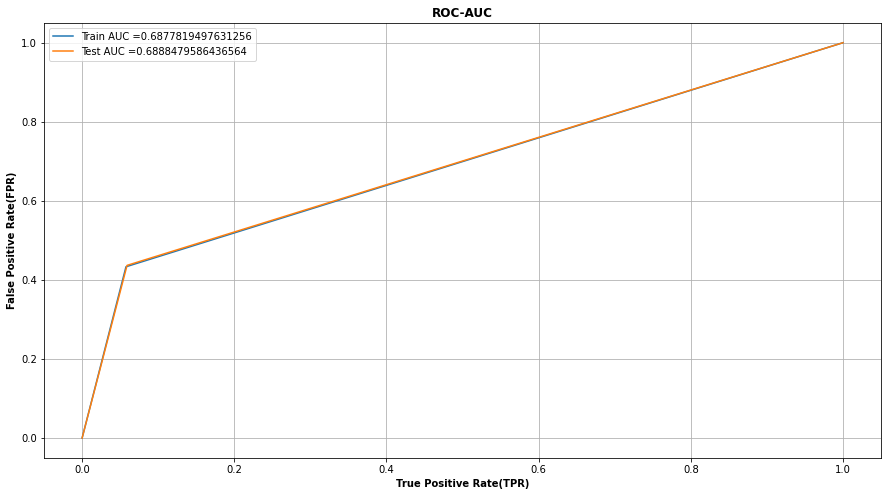

In [195]:
y_train_pred = model.predict(X_train)    
y_test_pred = model.predict(X_test)


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC", fontweight='bold')
plt.grid()
plt.show() 

In [196]:
log_prob=model.predict_proba(X_test)

In [197]:
log=pd.DataFrame()
log['ypred']=y_pred_test

In [198]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8205967794445418

Naive Bayes


In [199]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild


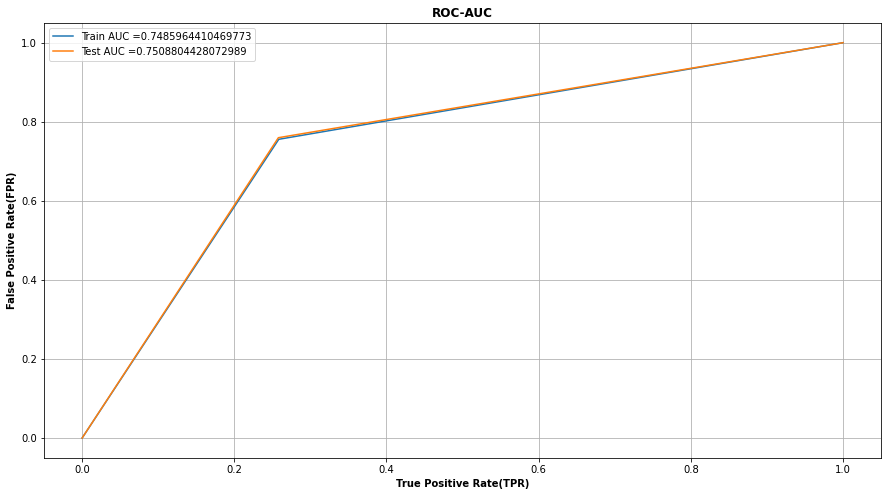

In [200]:
y_train_pred = model.predict(X_train)    
y_test_pred = model.predict(X_test)


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC", fontweight='bold')
plt.grid()
plt.show() 

In [201]:
y_pred_test=model.predict(testdf)

In [202]:
naive_prob=model.predict_proba(testdf)[:,1]

In [203]:
naive_prob

array([0.7396302 , 0.16946814, 0.52949365, ..., 0.83433746, 0.04182232,
       0.81836938])

In [204]:
naive_p=naive_prob.tolist()

In [205]:
naive=pd.DataFrame()

naive['member_id']=testdf['member_id']
naive['loan_status']=naive_p

In [206]:
naive.to_csv('sample_submission.csv',index=False)

In [207]:
naive

,member_id,loan_status
0,11937648,0.739630
1,38983318,0.169468
2,27999917,0.529494
3,61514932,0.005387
4,59622821,0.032053
...,...,...
354946,19145105,0.640318
354947,46304777,0.003597
354948,903745,0.834337
354949,53032475,0.041822


In [208]:
accuracy_score(y_test, y_pred)

0.7462936064711627

In [209]:
y_pred_test=model.predict(testdf)

In [210]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7462936064711627
